# Fitness Technology Analysis
## Determining the Trends in User Habits

Imports

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

Load in the data

In [2]:
user_daily_activity = pd.read_csv('./processed_data/activity_daily.csv')
user_performance = pd.read_csv('./processed_data/performance_minute.csv')
user_weight_loss = pd.read_csv('./processed_data/weight_loss_tracker.csv')

View the data

In [3]:
#Rearrange the order of columns
columns = user_daily_activity.columns
#Place the last column in the second position
ordered_columns = [columns[0]] + [columns[-1]] + list(columns[1:-1])
user_daily_activity = user_daily_activity[ordered_columns]
user_daily_activity.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12 00:00:00.000,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13 00:00:00.000,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14 00:00:00.000,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15 00:00:00.000,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16 00:00:00.000,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
user_performance.head()

,Id,Date,Calories,Intensity,METs,Sleep_Score,Num_of_Steps,Heart_Rate
0,1503960366,2016-04-12 00:00:00.000,0.7865,0,10,NaN,0,NaN
1,1503960366,2016-04-12 00:01:00.000,0.7865,0,10,NaN,0,NaN
2,1503960366,2016-04-12 00:04:00.000,0.7865,0,10,NaN,0,NaN
3,1503960366,2016-04-12 00:06:00.000,0.9438,0,12,NaN,0,NaN
4,1503960366,2016-04-12 00:09:00.000,0.9438,0,12,NaN,0,NaN


In [5]:
user_weight_loss.head()

,Id,Date,Weight_pounds,BMI,Log_count,Weight_Loss_pounds
0,6962181067,2016-04-12 23:59:59.000,137.788910,24.389999,30,NaN
1,6962181067,2016-04-13 23:59:59.000,136.907059,24.240000,30,-0.881851
2,6962181067,2016-04-14 23:59:59.000,136.025223,24.100000,30,-0.881836
3,6962181067,2016-04-15 23:59:59.000,135.584290,24.000000,30,-0.440933
4,6962181067,2016-04-16 23:59:59.000,136.686600,24.209999,30,1.102310


Convert all the dates to datetime objects

In [16]:
#Lambda function to convert string dates into datetime objects
datetime_converter = lambda date_string: datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S.000')

#Apply lambda function to the three data frames
dfs = [user_daily_activity, user_performance, user_weight_loss]
for df in dfs:
    df.Date = df.Date.apply(datetime_converter)

Convert Id to string objects to avoid it being included in summary statistics

In [ ]:
def convert_Id(df):
    #Convert the Id column from a numerical data type to a string data type
    df.Id = df.Id.astype('object')
    return df

#Convert the Id columns for each data frame
user_daily_activity = convert_Id(user_daily_activity)
user_performance = convert_Id(user_performance)
user_weight_loss = convert_Id(user_weight_loss)

### Explore the data

In [6]:
user_daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,908.0,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.0,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.0,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.0,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.0,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.0,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,0.0,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


From the above summary statistics, we can see that LogedActivitiesDistance contains all 0s and a few NULL values. This means that it contains no useful information, so it will be removed.<br>Furthermore, the Id column is being considered as numerical data, so it will be converted to string data to correct the data type

In [7]:
user_daily_activity.drop('LoggedActivitiesDistance', axis=1, inplace=True)

Analyze the activity of users at different days of the week

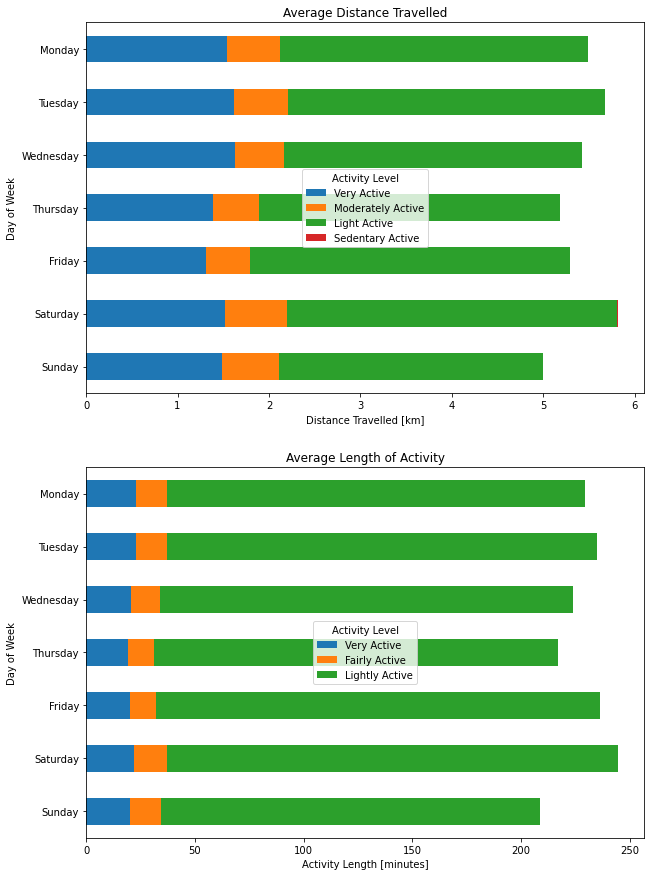

In [88]:
#Extract the day of the week
user_daily_activity['Day of Week'] = user_daily_activity.Date.apply(lambda x: x.strftime('%A'))
#Extract the columns that log the distance travelled and lenghth of activity for each activity level
distance_vars = [col for col in user_daily_activity.columns if 'ActiveDistance' in col]
minute_vars = [col for col in user_daily_activity.columns if 'ActiveMinutes' in col]
#Aggregate the data by the day of the week
weekday_activity = user_daily_activity.groupby('Day of Week')[distance_vars + minute_vars].mean()
#Sort the values by the day of the week
weekday_mapping = {
    'Monday':    1,
    'Tuesday':   2,
    'Wednesday': 3,
    'Thursday':  4,
    'Friday':    5,
    'Saturday':  6,
    'Sunday':    7
}
weekday_order = [weekday_mapping[index] for index in weekday_activity.index]
weekday_activity['order'] = weekday_order
weekday_activity.sort_values(by='order', inplace=True, ascending=False)

#Seperate distance and minutes travelled for plotting
weekday_distance = weekday_activity[distance_vars]
weekday_minutes = weekday_activity[minute_vars]
#Rename column names
distance_mapping = {col: col.replace('ActiveDistance', ' Active') for col in distance_vars}
minutes_mapping = {col: col.replace('ActiveMinutes', ' Active') for col in minute_vars}
weekday_distance.rename(columns=distance_mapping, inplace=True)
weekday_minutes.rename(columns=minutes_mapping, inplace=True)
#Plot the results
fig, axs = plt.subplots(nrows=2, figsize=(10,15))
weekday_distance.plot.barh(stacked=True, ax=axs[0])
weekday_minutes.plot.barh(stacked=True, ax=axs[1])
#Set legend details
for ax in axs:
    ax.legend(title='Activity Level', loc='center')
#Set ylabels
axs[0].set_xlabel('Distance Travelled [km]')
axs[1].set_xlabel('Activity Length [minutes]')
#Set titles
axs[0].set_title('Average Distance Travelled')
axs[1].set_title('Average Length of Activity')
plt.show()

In [16]:
user_performance.describe()

,Calories,Intensity,METs,Sleep_Score,Num_of_Steps,Heart_Rate
count,1.328296e+06,1.328303e+06,1.328303e+06,187122.000000,1.328303e+06,216555.000000
mean,1.622529e+00,2.003127e-01,1.468368e+01,1.095831,5.329117e+00,75.117397
std,1.409560e+00,5.186451e-01,1.204705e+01,0.328800,1.811556e+01,15.667627
min,7.027000e-01,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,38.000000
25%,9.357000e-01,0.000000e+00,1.000000e+01,1.000000,0.000000e+00,64.000000
50%,1.217600e+00,0.000000e+00,1.000000e+01,1.000000,0.000000e+00,72.000000
75%,1.432700e+00,0.000000e+00,1.100000e+01,1.000000,0.000000e+00,83.000000
max,1.974995e+01,3.000000e+00,1.570000e+02,3.000000,2.200000e+02,202.000000
